<a href="https://colab.research.google.com/github/bkn872/GL_Hackathon/blob/main/NLP_Project1_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Part A - 40 Marks:**

# **DOMAIN:** Digital content management

• **CONTEXT:** Classification is probably the most popular task that you would deal with in real life. Text in the form of blogs, posts, articles, etc. 
are written every second. It is a challenge to predict the information about the writer without knowing about him/her. We are going to create a 
classifier that predicts multiple features of the author of a given text. We have designed it as a Multi label classification problem.

• **DATA DESCRIPTION**: Over 600,000 posts from more than 19 thousand bloggers The Blog Authorship Corpus consists of the collected posts of 
19,320 bloggers gathered from blogger.com in August 2004. The corpus incorporates a total of 681,288 posts and over 140 million words - or 
approximately 35 posts and 7250 words per person. Each blog is presented as a separate file, the name of which indicates a blogger id# and 
the blogger’s self-provided gender, age, industry, and astrological sign. (All are labelled for gender and age but for many, industry and/or sign is 
marked as unknown.) All bloggers included in the corpus fall into one of three age groups:

• 8240 "10s" blogs (ages 13-17),

• 8086 "20s" blogs(ages 23-27) and

• 2994 "30s" blogs (ages 33-47)

• For each age group, there is an equal number of male and female bloggers. Each blog in the corpus includes at least 200 occurrences of 
common English words. All formatting has been stripped with two exceptions. Individual posts within a single blogger are separated by the 
date of the following post and links within a post are denoted by the label url link.

### **PROJECT OBJECTIVE:** 
To build a NLP classifier which can use input text parameters to determine the label/s of the blog. Specific to this case
study, you can consider the text of the blog: ‘text’ feature as independent variable and ‘topic’ as dependent variable.

Steps and tasks: [ Total Score: 40 Marks]

1.1. Read and Analyse Dataset. [5 Marks]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
##warnings.filewarnings('ignore')

from google.colab import drive
drive.mount('/content/drive/')
project_path = "/content/drive/My Drive/Python/NLP/"

from zipfile import ZipFile
with ZipFile(project_path+'blogs.zip','r') as z:
  z.extractall()

Mounted at /content/drive/


In [2]:
data=pd.read_csv('./blogtext.csv')
data.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [3]:
data.tail()

,id,gender,age,topic,sign,date,text
681279,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan, I could write some really ..."
681280,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan, 'I have the second yeast i..."
681281,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan, Your 'boyfriend' is fuckin..."
681282,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan: Just to clarify, I am as..."
681283,1713845,male,23,Student,Taurus,"01,July,2004","Hey everybody...and Susan, You might a..."


In [4]:
data.isnull().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

In [5]:
data[pd.isnull(data).any(axis=1)]

,id,gender,age,topic,sign,date,text


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681284 entries, 0 to 681283
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      681284 non-null  int64 
 1   gender  681284 non-null  object
 2   age     681284 non-null  int64 
 3   topic   681284 non-null  object
 4   sign    681284 non-null  object
 5   date    681284 non-null  object
 6   text    681284 non-null  object
dtypes: int64(2), object(5)
memory usage: 36.4+ MB


In [7]:
print(data['id'].value_counts())

449628     4221
734562     2301
589736     2294
1975546    2261
958176     2244
           ... 
3424020       1
4325089       1
3516939       1
3331848       1
3717818       1
Name: id, Length: 19320, dtype: int64


In [8]:
print(data['gender'].unique())

['male' 'female']


In [9]:
print(data['gender'].value_counts())

male      345193
female    336091
Name: gender, dtype: int64


In [10]:
print(data['topic'].unique())

['Student' 'InvestmentBanking' 'indUnk' 'Non-Profit' 'Banking' 'Education'
 'Engineering' 'Science' 'Communications-Media' 'BusinessServices'
 'Sports-Recreation' 'Arts' 'Internet' 'Museums-Libraries' 'Accounting'
 'Technology' 'Law' 'Consulting' 'Automotive' 'Religion' 'Fashion'
 'Publishing' 'Marketing' 'LawEnforcement-Security' 'HumanResources'
 'Telecommunications' 'Military' 'Government' 'Transportation'
 'Architecture' 'Advertising' 'Agriculture' 'Biotech' 'RealEstate'
 'Manufacturing' 'Construction' 'Chemicals' 'Maritime' 'Tourism'
 'Environment']


In [11]:
print(data['topic'].value_counts())

indUnk                     251015
Student                    153903
Technology                  42055
Arts                        32449
Education                   29633
Communications-Media        20140
Internet                    16006
Non-Profit                  14700
Engineering                 11653
Law                          9040
Publishing                   7753
Science                      7269
Government                   6907
Consulting                   5862
Religion                     5235
Fashion                      4851
Marketing                    4769
Advertising                  4676
BusinessServices             4500
Banking                      4049
Chemicals                    3928
Telecommunications           3891
Accounting                   3832
Military                     3128
Museums-Libraries            3096
Sports-Recreation            3038
HumanResources               3010
RealEstate                   2870
Transportation               2326
Manufacturing 

In [12]:
print(data['age'].nunique())

26


In [13]:
print(data['sign'].unique())

['Leo' 'Aquarius' 'Aries' 'Capricorn' 'Gemini' 'Cancer' 'Sagittarius'
 'Scorpio' 'Libra' 'Virgo' 'Taurus' 'Pisces']


In [14]:
print(data['sign'].value_counts())

Cancer         65048
Aries          64979
Taurus         62561
Libra          62363
Virgo          60399
Scorpio        57161
Pisces         54053
Leo            53811
Gemini         51985
Sagittarius    50036
Aquarius       49687
Capricorn      49201
Name: sign, dtype: int64


In [15]:
print(data['age'].unique())

[15 33 14 25 17 23 37 26 24 27 45 34 41 44 16 39 35 36 46 42 13 38 43 40
 47 48]


In [16]:
print(data['age'].value_counts())

17    80859
24    80071
23    72889
16    72708
25    67051
26    55312
27    46124
15    41767
14    27400
34    21347
33    17584
35    17462
36    14229
13    13133
37     9317
38     7545
39     5556
40     5016
45     4482
43     4230
41     3738
48     3572
42     2908
46     2733
47     2207
44     2044
Name: age, dtype: int64


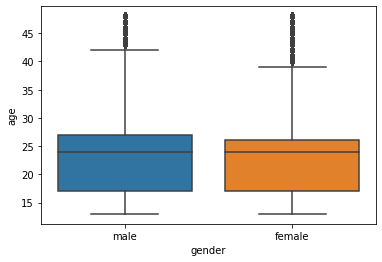

In [17]:
sns.boxplot(x='gender', y='age', data=data)

In [ ]:
plt.figure(figsize = (20,8))
plt.xticks(rotation = 'vertical')
sns.boxplot(x='topic', y='age', data=data )

In [ ]:
plt.figure(figsize = (14,8))
plt.xticks(rotation = 'vertical')
#plt.xlabel("Sign")
#plt.ylabel("Age")
plt.title("Sign vs. Age observations")
sns.boxplot(x='sign', y='age', data=data)

Aries have less outliers 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


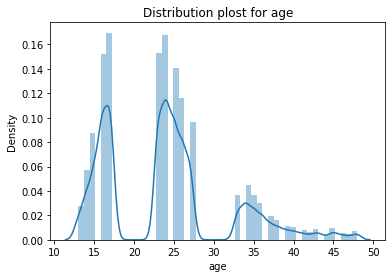

In [35]:
plt.title('Distribution plost for age')
sns.distplot(data['age'])

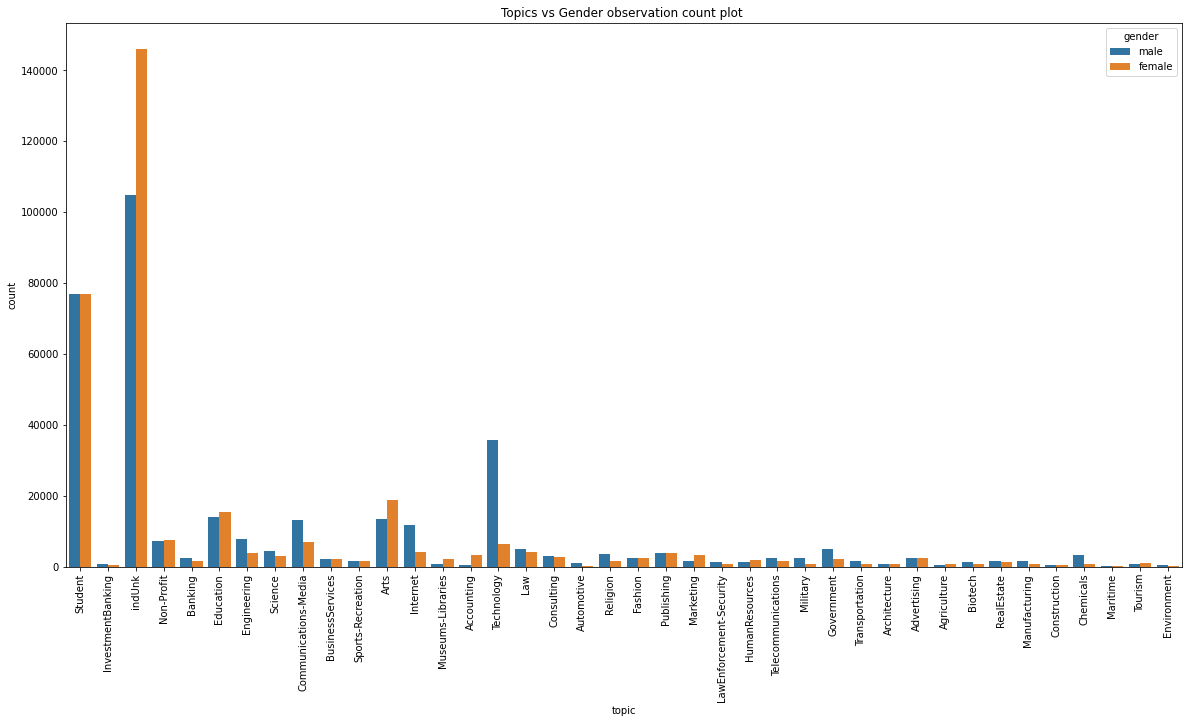

In [36]:
plt.figure(figsize=(20,10))
plt.title('Topics vs Gender observation count plot ')
plt.xticks(rotation='vertical')
sns.countplot(x="topic",hue='gender', data=data)

observed that in indUnk topics more Female paticipated 
and in Technology more Males Participated 

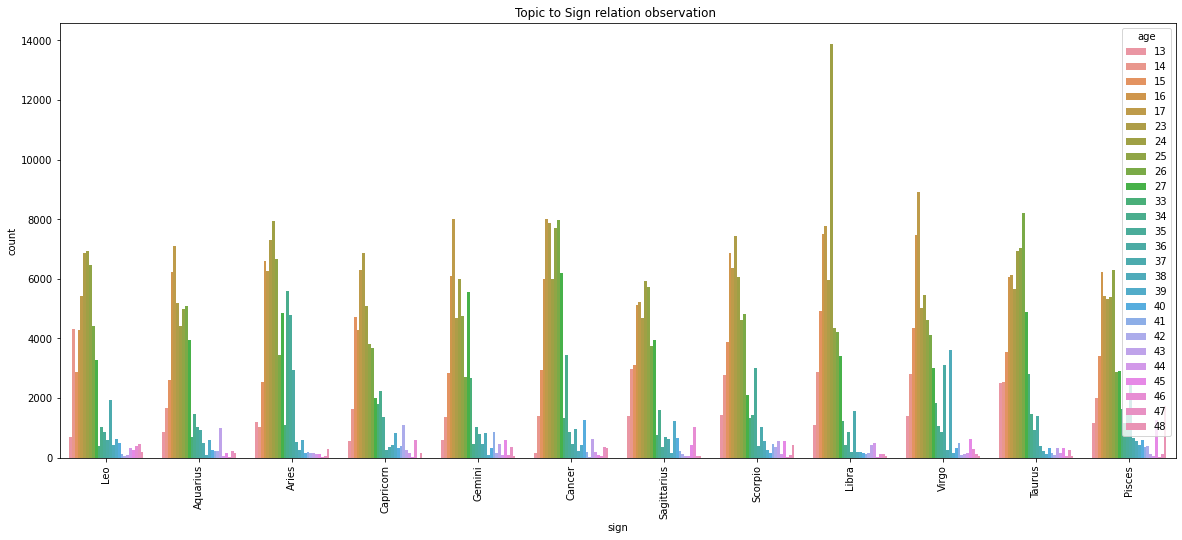

In [37]:
plt.figure(figsize=(20,8))
plt.title('Topic to Sign relation observation ')
plt.xticks(rotation='vertical')
sns.countplot(x='sign', hue ='age',data=data)


More persons from Libra sign in 25 age group

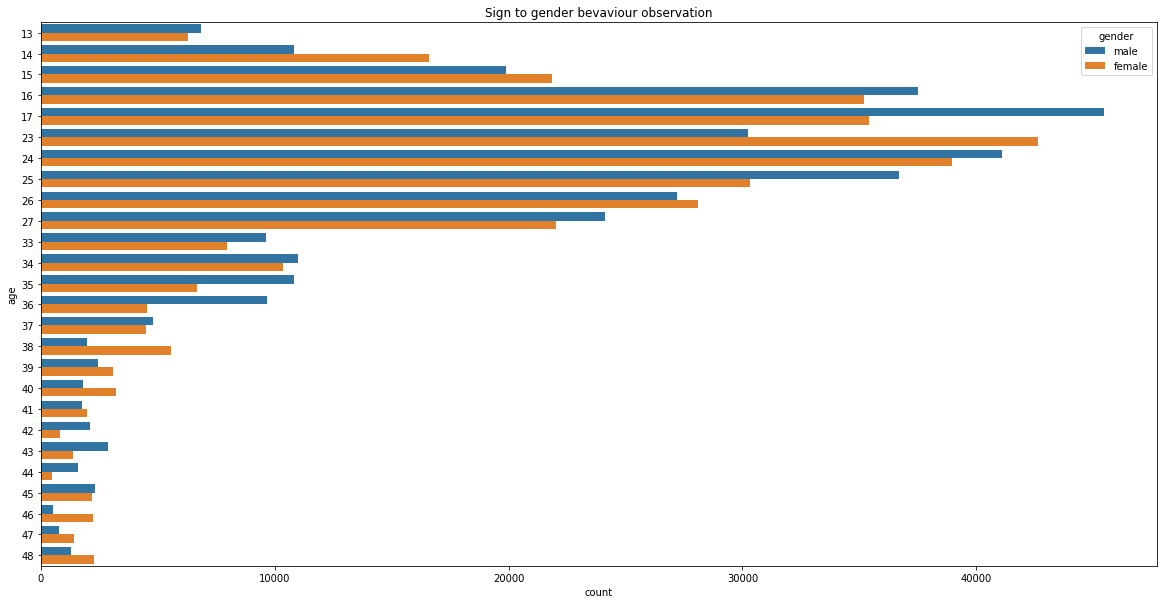

In [38]:
plt.figure(figsize=(20,10))
plt.title('Sign to gender bevaviour observation')
sns.countplot( y='age', hue='gender', data=data)

More number of persons 
More from 17age males and
more Females from 23 age 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff3fbb84390>,
      dtype=object)

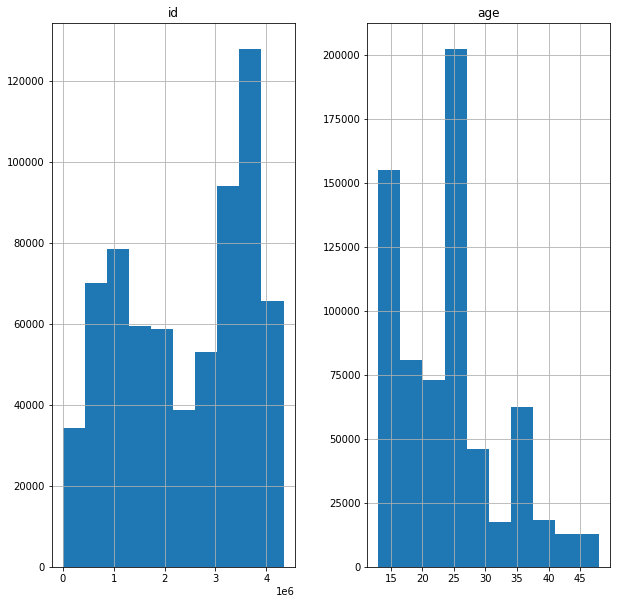

In [39]:
data.hist(figsize=(10,10))

In [40]:
pd.crosstab(data['age'],data['topic'])

topic,Accounting,Advertising,Agriculture,Architecture,Arts,Automotive,Banking,Biotech,BusinessServices,Chemicals,...,RealEstate,Religion,Science,Sports-Recreation,Student,Technology,Telecommunications,Tourism,Transportation,indUnk
age,,,,,,,,,,,,,,,,,,,,,
13,0,11,0,0,167,0,2,109,0,21,...,3,4,291,10,5310,154,15,0,0,5591
14,0,0,73,33,1205,28,0,136,14,32,...,0,30,53,48,13491,129,50,5,18,9299
15,75,21,85,68,1313,29,0,285,18,369,...,72,147,185,167,20681,351,0,46,13,14259
16,79,12,119,13,2249,14,17,131,184,522,...,5,543,120,233,40077,2233,162,177,42,21552
17,158,65,82,25,1375,141,116,82,173,96,...,525,474,84,822,37608,2678,13,116,73,25160
23,782,1501,180,156,3125,63,250,176,429,797,...,291,179,1108,766,12862,3140,170,481,78,26526
24,541,400,190,383,6938,26,486,145,1004,533,...,604,273,1176,198,8569,7288,240,110,244,32565
25,480,277,40,268,5231,300,2008,619,615,1375,...,331,72,1520,324,6334,4787,789,452,159,23958
26,123,664,287,157,3496,81,154,181,650,120,...,10,592,1283,109,4624,5052,1180,126,102,17686


In [41]:
data.describe(include="all")

,id,gender,age,topic,sign,date,text
count,6.812840e+05,681284,681284.000000,681284,681284,681284,681284
unique,NaN,2,NaN,40,12,2616,611652
top,NaN,male,NaN,indUnk,Cancer,"02,August,2004",urlLink
freq,NaN,345193,NaN,251015,65048,16544,445
mean,2.397802e+06,NaN,23.932326,NaN,NaN,NaN,NaN
std,1.247723e+06,NaN,7.786009,NaN,NaN,NaN,NaN
min,5.114000e+03,NaN,13.000000,NaN,NaN,NaN,NaN
25%,1.239610e+06,NaN,17.000000,NaN,NaN,NaN,NaN
50%,2.607577e+06,NaN,24.000000,NaN,NaN,NaN,NaN
75%,3.525660e+06,NaN,26.000000,NaN,NaN,NaN,NaN


In [43]:
Male=data.groupby('gender')

In [44]:
Male.first()

,id,age,topic,sign,date,text
gender,,,,,,
female,3539003,14,indUnk,Aries,"07,June,2004",O= optimist P= pessimist My...
male,2059027,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."


In [45]:
Male.get_group('male')

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...
...,...,...,...,...,...,...,...
681279,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan, I could write some really ..."
681280,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan, 'I have the second yeast i..."
681281,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan, Your 'boyfriend' is fuckin..."
681282,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan: Just to clarify, I am as..."


In [46]:
Male.get_group('female')

,id,gender,age,topic,sign,date,text
74,3539003,female,14,indUnk,Aries,"07,June,2004",O= optimist P= pessimist My...
75,3539003,female,14,indUnk,Aries,"05,June,2004",Look at me. Look at my eyes....
76,3539003,female,14,indUnk,Aries,"05,June,2004",I walk into the only entranc...
77,3539003,female,14,indUnk,Aries,"05,June,2004",Why do I like him? He's funn...
78,3539003,female,14,indUnk,Aries,"04,June,2004","I've fallen so deep, so fast..."
...,...,...,...,...,...,...,...
681156,4260903,female,34,indUnk,Virgo,"23,August,2004",I ran around cleaning all mor...
681157,4260903,female,34,indUnk,Virgo,"21,August,2004",We just got back from Six Fla...
681158,4260903,female,34,indUnk,Virgo,"19,August,2004",urlLink I felt kind of ...
681159,4260903,female,34,indUnk,Virgo,"18,August,2004","Wow, I love fruit. I read th..."


In [47]:
df_top_20 = data['topic'].value_counts().nlargest(20).reset_index()
df_top_20 

,index,topic
0,indUnk,251015
1,Student,153903
2,Technology,42055
3,Arts,32449
4,Education,29633
5,Communications-Media,20140
6,Internet,16006
7,Non-Profit,14700
8,Engineering,11653
9,Law,9040


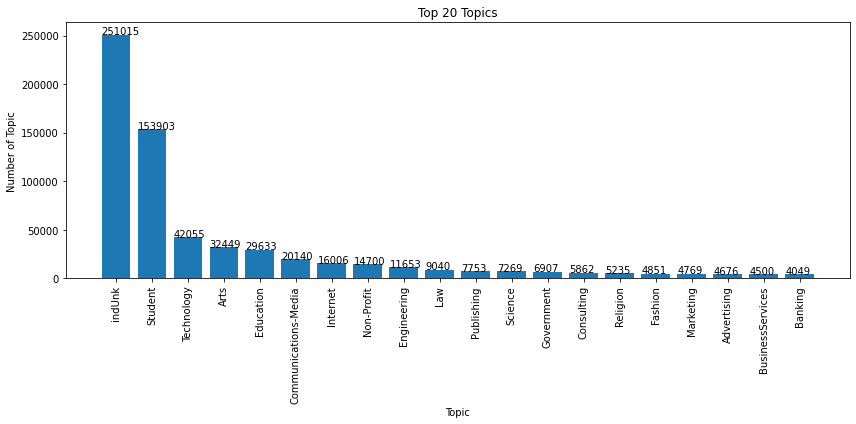

In [48]:
plt.figure(figsize=(12,6))
bars = plt.bar(df_top_20['index'],df_top_20['topic'])
plt.title('Top 20 Topics')
plt.xlabel('Topic')
plt.xticks(rotation=90)
plt.ylabel('Number of Topic')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval +1, yval)
plt.tight_layout()
plt.show()

1.1.A. Clearly write outcome of data analysis(Minimum 2 points) [2 Marks]

1) The data Provided by Male and Female and in the age group of 17 to 44 years

2) More number of persons More from 17age males and more Females from 23 age

1.1.B. Clean the Structured Data [3 Marks]

i. Missing value analysis and imputation. [1 Marks]

ii. Eliminate Non-English textual data. [2 Marks]

Hint: Refer ‘langdetect’ library to detect language of the input text)

In [49]:
data.shape

(681284, 7)

In [50]:
for mat in data :
  print(mat)

id
gender
age
topic
sign
date
text


In [51]:
df_inc=data['topic'].value_counts().reset_index()
df_inc['Percentage']=(df_inc['topic']/df_inc['topic'].sum())*100
df_inc

,index,topic,Percentage
0,indUnk,251015,36.844400
1,Student,153903,22.590139
2,Technology,42055,6.172903
3,Arts,32449,4.762918
4,Education,29633,4.349581
5,Communications-Media,20140,2.956183
6,Internet,16006,2.349387
7,Non-Profit,14700,2.157690
8,Engineering,11653,1.710447
9,Law,9040,1.326906


In [52]:
pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 17.5 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=f48b0f6e08d270a02bab7762afc81ffa85049dd393504b5e633d0302c2b43d38
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [ ]:
from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0
detect('今一はお前さん')

'ja'

In [ ]:
from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0
detect('[data]')

'id'

In [ ]:
import re
import nltk
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681284 entries, 0 to 681283
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      681284 non-null  int64 
 1   gender  681284 non-null  object
 2   age     681284 non-null  int64 
 3   topic   681284 non-null  object
 4   sign    681284 non-null  object
 5   date    681284 non-null  object
 6   text    681284 non-null  object
dtypes: int64(2), object(5)
memory usage: 36.4+ MB


## 1.2. Preprocess unstructured data to make it consumable for model training. [5 Marks]

1.2.A. Eliminate All special Characters and Numbers [2 Marks]

In [ ]:
messages = data[["topic","text"]]
messages


,topic,text
0,Student,"Info has been found (+/- 100 pages,..."
1,Student,These are the team members: Drewe...
2,Student,In het kader van kernfusie op aarde...
3,Student,testing!!! testing!!!
4,InvestmentBanking,Thanks to Yahoo!'s Toolbar I can ...
...,...,...
681279,Student,"Dear Susan, I could write some really ..."
681280,Student,"Dear Susan, 'I have the second yeast i..."
681281,Student,"Dear Susan, Your 'boyfriend' is fuckin..."
681282,Student,"Dear Susan: Just to clarify, I am as..."


In [ ]:
messages.shape

(681284, 2)

In [ ]:
data.fillna(" ",inplace=True)

In [ ]:
data.isna().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

In [ ]:
data.nunique()

id         19320
gender         2
age           26
topic         40
sign          12
date        2616
text      611652
dtype: int64

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,681284.0,2.397802e+06,1.247723e+06,5114.0,1239610.0,2607577.0,3525660.0,4337650.0
age,681284.0,2.393233e+01,7.786009e+00,13.0,17.0,24.0,26.0,48.0


In [ ]:
messages['text'].loc[451]

"              Silly Songs with Sarah  I'm not sure if I've ever shared my 'Wilbur' song with anyone via my blog, but I thought, heck, maybe I should entertain people once in awhile...   To the tune of Copacabana     His name was Wilbur He was a show-pig With that blue ribbon on his snout He was the one that was no doubt He was the winner! For all their dinners... Bring out the forks,  and the knives, and the plates, Because dear Wilbur...  bam bam bam  He's Christmas ham...   How didja like that? Didja didja  DIDJA ??!!            "

In [ ]:
messages['text'].loc[500]

"       On Monday I started the possibility of the process of buying my own place.  I just met with a realtor, that's all, no paper-signing going on, no commitments, yet.  It's a scary thing this idea of home ownership, signing away your life for 30 years.  It's a good idea, financially, but mentally, is this good for me?    I have a few single girlfriends who have bought places.  Two friends in Richmond bought houses.  I think they have balls.  Not that home ownership is that big of a deal, but a house is a big deal.  I personally can't go that big.  The mowing, the pruning, roof replacement, window washing, it's too much.  I can barely handle keeping my 6-room apartment in orderly shape.  I can just imagine the letters from neighbors that I would get concerning the jungle that would certainly grow outside my home.  So a condo, a condo sounds good to me.  It's like an apartment, but I'd get to paint the walls and a tax deduction.    Condo searching is hard.  While I'm still in the beg

1.2.B. Lowercase all textual data [1 Marks]

1.2.C. Remove all Stopwords [1 Marks]

In [ ]:
#Data cleaning and preprocessing
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

1.2.D. Remove all extra white spaces [1 Marks]

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [ ]:
# Select only alphabets
import re
data.text = data.text.apply(lambda x: re.sub('[^A-Za-z]+', ' ', x))

# Convert text to lowercase
data.text = data.text.apply(lambda x: x.lower())

# Strip unwanted spaces
data.text = data.text.apply(lambda x: x.strip())

# Remove stopwords
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
data.text = data.text.apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))

In [ ]:
data.text[6]

'somehow coca cola way summing things well early flagship jingle like buy world coke tune like teach world sing pretty much summed post woodstock era well add much sales catchy tune korea coke theme urllink stop thinking feel pretty much sums lot korea koreans look relaxed couple stopped thinking started feeling course high regard education math logic deep think many koreans really like work emotion anything else westerners seem sublimate moreso least display different way maybe scratch westerners koreans probably pretty similar context different anyways think losing korea repeat stop thinking feel stop thinking feel stop thinking feel everything alright'

In [ ]:
data.text[3000]

'bill reilly said anything comment since'

##1.3. Build a base Classification model [8 Marks]

1.3.A. Create dependent and independent variables [2 Marks]

Hint: Treat ‘topic’ as a Target variable.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.text.values, data.topic.values, test_size=0.20, random_state=42)

1.3.B. Split data into train and test. [1 Marks]

In [ ]:
X_train

array(['usual getting daily dose blog never taken drugs life blogs truly addictive come across guy blog talking gun shit getting techincal today sake sanity life gun freak spelled vivid detail today wow guns possible tell guns could get intellectual tell break hk without even breaking sweat could tell glock best gun street battle could tell gun made davis worth three bucks could tell smith wesson priceless street could also tell powerful handgun ever fired super python magnum get point probably somewhere deep recesses body gun fanatic every since young father held interest projectile weaponry seeped genes father owned mossberg bolt action shotgun antique used take leather case touch butt gave tingly type feeling first gun ever raven automatic clip bullets hole chamber cheapest gun made man whole pin exposed inside chamber pin piece metal hits bullet makes fire bullet fires chamber slides back another bullet loaded uh exposed pin one jam pin breaks gun worthless course would think would

In [ ]:
X_test

array(['corinthians written keep company anyone named brother sexually immoral covetous idolater reviler drunkard extortioner even eat person sounds somewhat simple right wrong applying verse life hard sister fits things need figure obedient much time okay spend parents supposed ostricize family know uncle mostly also cousins probably claim many people christians yet drunks go family functions supposed like grandad pretend like going going seek',
       'moved jersey city nearly month ago idea would packing camp original homeland philippines well perhaps homeland away homeland new jersey familiarizing new neighborhood strolled west side avenue dumbfounded see large wooden sign overhead local store carved lettering filipinas market wait filipina even perfume called filipina extraordinary woman arranged adoption back gave years ago birthday use special occasions hoping make last bottle bone dry even like puny little puddle molasses like shampoo might take days finally ooze add little wat

In [ ]:
y_train

array(['Arts', 'indUnk', 'indUnk', ..., 'indUnk', 'Communications-Media',
       'Education'], dtype=object)

In [ ]:
y_test

array(['indUnk', 'Arts', 'indUnk', ..., 'Law', 'Student', 'Arts'],
      dtype=object)

1.3.C. Vectorize data using any one vectorizer. [2 Marks]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2))
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

1.3.D. Build a base model for Supervised Learning - Classification. [2 Marks]

In [ ]:
vectorizer.get_feature_names()[:5]

['aa', 'aa aa', 'aa aaa', 'aa aaaa', 'aa aaaaa']

1.3.E. Clearly print Performance Metrics. [1 Marks]

Hint: Accuracy, Precision, Recall, ROC-AUC

1.4. Improve Performance of model. [14 Marks]

In [ ]:
topic_counts = dict()
for topic in data.topic.values:
    for topic in topic:
        if topic in topic_counts:
           topic_counts[topic] += 1
        else:
            topic_counts[topic] = 1

In [ ]:
topic_counts

{'S': 170588,
 't': 507176,
 'u': 256535,
 'd': 459367,
 'e': 380765,
 'n': 965837,
 'I': 17298,
 'v': 19211,
 's': 129419,
 'm': 72231,
 'B': 12075,
 'a': 131099,
 'k': 261125,
 'i': 499536,
 'g': 106336,
 'U': 251015,
 'N': 14700,
 'o': 242950,
 '-': 42852,
 'P': 22453,
 'r': 134399,
 'f': 18850,
 'E': 46626,
 'c': 150154,
 'C': 31023,
 'M': 33685,
 'p': 5364,
 'R': 14153,
 'A': 45074,
 'L': 14014,
 'b': 10849,
 'T': 50214,
 'h': 62459,
 'l': 75957,
 'y': 47061,
 'w': 10918,
 'F': 4851,
 'H': 3010,
 'G': 6907}

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(classes=sorted(topic_counts.keys()))
y_train = mlb.fit_transform(y_train)
y_test = mlb.transform(y_test)

1.4.A. Experiment with other vectorisers. [4 Marks]

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='lbfgs')
clf = OneVsRestClassifier(clf)


1.4.B. Build classifier Models using other algorithms than base model. [4 Marks]

1.4.C. Tune Parameters/Hyperparameters of the model/s. [4 Marks]

1.4.D. Clearly print Performance Metrics. [2 Marks]

Hint: Accuracy, Precision, Recall, ROC-AUC

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

In [ ]:

def print_evaluation_scores(y_val, predicted):
    print('Accuracy score: ', accuracy_score(y_val, predicted))
    print('F1 score: ', f1_score(y_val, predicted, average='micro'))
    print('Average precision score: ', average_precision_score(y_val, predicted, average='micro'))
    print('Average recall score: ', recall_score(y_val, predicted, average='micro'))

##1.5. Share insights on relative performance comparison [8 Marks]

1.5.A. Which vectorizer performed better? Probable reason?.
[2 Marks]

In [ ]:
import gensim

In [ ]:
from gensim.models import Word2Vec, KeyedVectors

In [ ]:
from gensim import models

1.5.B. Which model outperformed? Probable reason? [2 Marks]

In [ ]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 5.5 kB/s 
     |████████████████████████████████| 438 kB 45.8 MB/s 
     |████████████████████████████████| 5.8 MB 775 kB/s 
     |████████████████████████████████| 1.6 MB 49.8 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.9.1


In [ ]:
##tensorflow >2.0
from tensorflow.keras.preprocessing.text import one_hot

In [ ]:
#List to hold all words in each review
documents = []

#Iterate over each review
for doc in data['text']:
    documents.append(doc.split(' '))

In [ ]:
print(len(documents))

681284


In [ ]:
print(documents[0])

['info', 'found', 'pages', 'mb', 'pdf', 'files', 'wait', 'untill', 'team', 'leader', 'processed', 'learns', 'html']


1.5.C. Which parameter/hyperparameter significantly helped to improve performance?Probable reason?. [2 Marks]

1.5.D. According to you, which performance metric should be given most importance, why?. [2 Marks]

#Part B - 20 Marks

**• DOMAIN:** Customer support

**• CONTEXT:** Great Learning has a an academic support department which receives numerous support requests every day throughout the year.
Teams are spread across geographies and try to provide support round the year. Sometimes there are circumstances where due to heavy
workload certain request resolutions are delayed, impacting company’s business. Some of the requests are very generic where a proper
resolution procedure delivered to the user can solve the problem. Company is looking forward to design an automation which can interact with
the user, understand the problem and display the resolution procedure [ if found as a generic request ] or redirect the request to an actual human
support executive if the request is complex or not in it’s database.

**DATA DESCRIPTION:** A sample corpus is attached for your reference. Please enhance/add more data to the corpus using your linguistics skills.

**• PROJECT OBJECTIVE:** Design a python based interactive semi - rule based chatbot which can do the following:

2.1. Start chat session with greetings and ask what the user is looking for. [5 Marks]

In [ ]:
import json

In [ ]:
gl=pd.read_json(project_path+'/GL Bot.json')
gl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   intents  8 non-null      object
dtypes: object(1)
memory usage: 192.0+ bytes


In [ ]:
### Vocabulary size
voc_size=500

In [ ]:
sent=[gl]
sent

[                                             intents
 0  {'tag': 'Intro', 'patterns': ['hi', 'how are y...
 1  {'tag': 'Exit', 'patterns': ['thank you', 'tha...
 2  {'tag': 'Olympus', 'patterns': ['olympus', 'ex...
 3  {'tag': 'SL', 'patterns': ['i am not able to u...
 4  {'tag': 'NN', 'patterns': ['what is deep learn...
 5  {'tag': 'Bot', 'patterns': ['what is your name...
 6  {'tag': 'Profane', 'patterns': ['what the hell...
 7  {'tag': 'Ticket', 'patterns': ['my problem is ...]

In [ ]:
ner=[sent]

In [ ]:
#Writing a function to put the entity, its label, and explanation together.
def display_entity(doc):
  if doc.ents:
    for entity in doc.ents:
      print(entity.text + '-' + entity.label_ + '-' + str(spacy.explain(entity.label_)))
  else:
    print('Entity not found')

In [ ]:
from spacy.tokens import Span

In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

In [ ]:
#Visualize NER
from spacy import displacy

In [ ]:
test=gl


In [ ]:
Corpus=gl
print(Corpus
      )

                                             intents
0  {'tag': 'Intro', 'patterns': ['hi', 'how are y...
1  {'tag': 'Exit', 'patterns': ['thank you', 'tha...
2  {'tag': 'Olympus', 'patterns': ['olympus', 'ex...
3  {'tag': 'SL', 'patterns': ['i am not able to u...
4  {'tag': 'NN', 'patterns': ['what is deep learn...
5  {'tag': 'Bot', 'patterns': ['what is your name...
6  {'tag': 'Profane', 'patterns': ['what the hell...
7  {'tag': 'Ticket', 'patterns': ['my problem is ...


2.2. Accept dynamic text based questions from the user. Reply back with relevant answer from the designed corpus. [10 Marks]

2.3. End the chat session only if the user requests to end else ask what the user is looking for. Loop continues till the user asks to end it. [5 Marks]

**Hint:** There are a lot of techniques using which one can clean and prepare the data which can be used to train a ML/DL classifier. Hence, it might
require you to experiment, research, self learn and implement the above classifier. There might be many iterations between hand building the
corpus and designing the best fit text classifier. As the quality and quantity of corpus increases the model’s performance i.e. ability to answer
right questions also increases.

Reference: https://www.mygreatlearning.com/blog/basics-of-building-an-artificial-intelligence-chatbot/